# Dataset partition

In [ ]:
import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/'
                      'wine/wine.data', header = None)
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines','Proline']
print('Class labels', np.unique(df_wine['Class label']))


Class labels [1 2 3]


In [ ]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
#y is used for labels and split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0, stratify = y)
#by size = 0.3 we asign 30% of wine examples to X_test and y_test, the remaining 70% to X_train and y_train
#by setting y as stratify we ensures that both training and test datasets have the same class proportions as the original dataset.



FEATURE SCALING 
<br>
Features scaling is a problem. 
Assume u have 2 features, one scale 1 to 10, the other 1 to 100.000 respectively, if we thought about squared error function it is almost sure that the algorithm will be busy optimizing the weights to the larger errors in the second feature. <br>
The common way to fix this is to normalization and standardalization. <br>
normalization is the rescaling of the features to a range of [0 , 1], this is a special case of min-max scaling. <br>
To do this we cam use min-max scaling to each feature column.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

<H1> STANDARDALIZATION <BR>
<h6>It is more practical for many ML algorithms such as gradient descent. The reason is that many linear models initializa with 0 or close to 0. <br>
Standardalization center the feature columns at mean 0 with standard deviation 1 so that the feature columns have the same parameters as a standard normal distribution, which makes it easier to learn the weights. but this doesnt change the shape of the distribution and doesnt transform non-normally distribuited data into normally distributed data. <br>
standardalization maintains useful information about ooutliers and makes the algorithm less sensitive to them in contrast to min-max scaling. <br> 

In [ ]:
ex = np.array([0, 1, 2, 3, 4, 5])
print('datas: ', ex)
print('standardized:', (ex - ex.mean()) / ex.std())
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

#in scikit
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

datas:  [0 1 2 3 4 5]
standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


# MEANINGFUL FEATURES

If we notice that a model performs much better on a training dataset then on the test dataset, this is a indicator of overfitting. in order to resolve this we reduce the generalization errors by:


1.   Collect more training data
2.   Penalty for compleixity via regularization
1.   Choose a simpler model with less parameter
2.   Reduce the dimensionality of data.

The 1. is not often practicable, we will practice to regularization and dimensionality reduction via feature selection, this leads simpler models by requiring fewer parameter to be fitted to the data.

<br> <H1>2. L1 and L2 regularization as penalties against model complexity
<br>
<h6> L2 is one of the approach to reduce the complexity of a model by penalizing large individual weights. <br>
L1 replace the square of the weights with the sum of the absolute values of the weights, L1 usually yields sparse feature vectors, most feature weights will be zero. Sparsity can be useful in practice if we have a high dimensional dataset with many irrelevant feature.






In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1',solver='liblinear',multi_class='ovr')   #l1 = sparse solution
lr = LogisticRegression(penalty='l1', C = 1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
lr.intercept_
lr.coef_

#This model is robust to irrelevant features in this dataaset(too many 0)


Training accuracy: 1.0
Test accuracy: 1.0


array([-1.26379704, -1.21609764, -2.37040029])

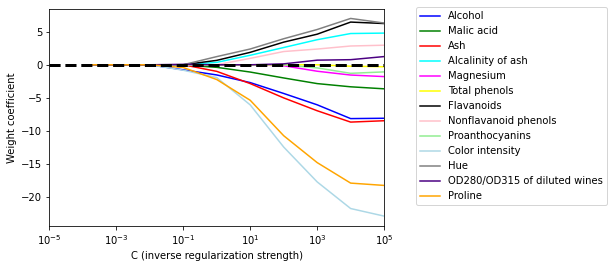

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan','magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue','gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
  lr = LogisticRegression(penalty='l1', C=10.**c,
                          solver='liblinear',
                          multi_class='ovr', random_state=0)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
  plt.plot(params, weights[:, column],
           label=df_wine.columns[column + 1],
           color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
            bbox_to_anchor=(1.38, 1.03),
            ncol=1, fancybox=True)
plt.show()